In [15]:
using Plots, Random, Distributions

## Estimating $\pi$

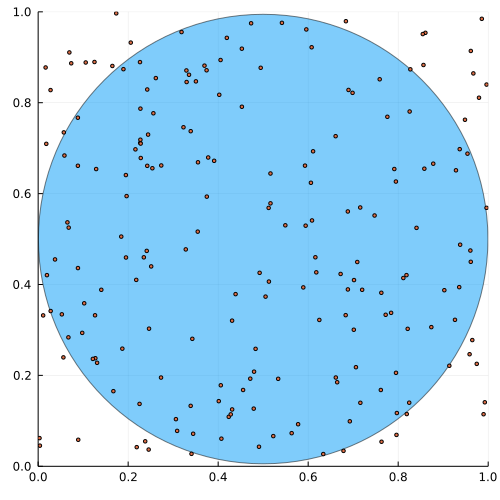

In [40]:
d = Uniform()
N = 200
x = rand(d, N)
y = rand(d, N)

markerunit = 100*(452.106/181)
scatter(
    [0.5],[0.5], markersize=markerunit, size=(500,500),
    xlims=(0,1), ylims=(0,1), alpha=0.5, legend = false
)
scatter!(x, y, markersize=2, legend=false)

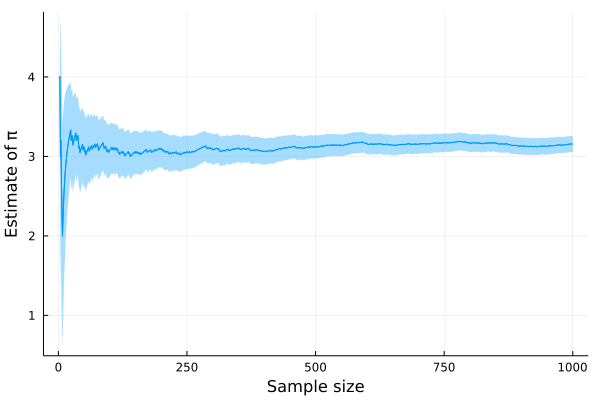

In [3]:
function circle_raindrop(N=1000)
    d = Uniform()
    x = rand(d, N)
    y = rand(d, N)
    pi = 4 * cumsum(x.^2 + y.^2 .< 1) ./ [1:1:N;]
    conf_int = 1.96 * (pi .* (4 .- pi) ./ [1:1:N;]) .^ 0.5
    return pi, conf_int
end

mid, w = circle_raindrop()
plot([mid mid], fillrange=[mid .- w, mid .+ w], fillalpha=0.35, c = [1 1], 
    xlabel = "Sample size", ylabel = "Estimate of \\pi", legend = false)


## Monte Carlo Integration

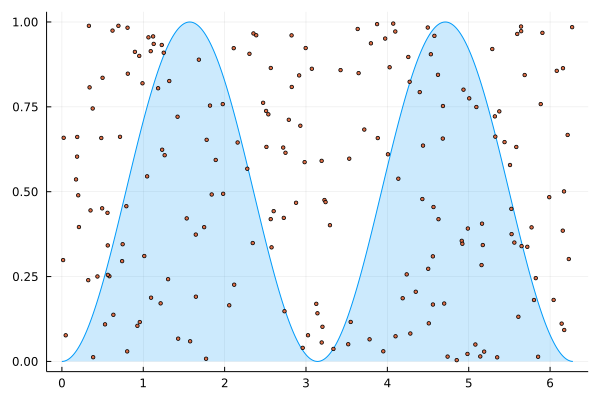

In [37]:
function f(x)
    sin.(x) .^ 2
end

N = 200
x = rand(Uniform(0, 2*pi), N)
y = rand(Uniform(), N)

lin_x = [0:0.01:2*pi;]
plot(lin_x, f(lin_x), fillrange = [zeros(length(lin_x)) f(lin_x)], legend = false, 
    fillalpha = 0.2)
scatter!(x, y, markersize = 2)

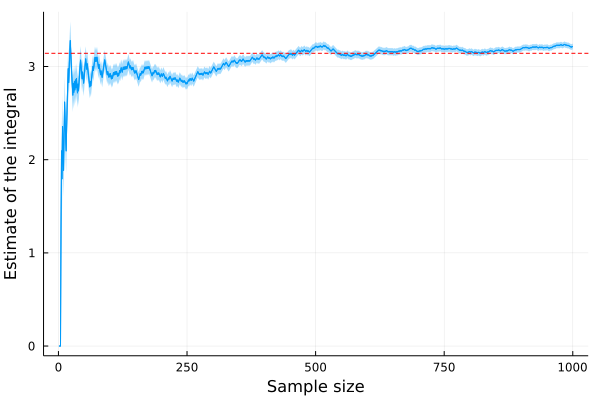

In [70]:
function integral_raindrop(N=1000)
    x = rand(Uniform(0, 2*pi), N)
    y = rand(Uniform(), N)
    prob = cumsum(y .< f(x)) ./ [1:1:N;]
    I = prob * (2 * pi)
    conf_int = 1.96 * (prob .* (1 .- prob) ./ [1:1:N;]) .^ 0.5
    return I, conf_int
end

mid, w = integral_raindrop()
plot([mid mid], fillrange=[mid .- w, mid .+ w], fillalpha=0.35, c = [1 1], 
    xlabel="Sample size", ylabel="Estimate of the integral", legend = false)
hline!([pi], linestyle=:dash, color="red")

## Pseudo-random numbers

### Congruential pseudo-random number generator

In [16]:
function cong_prng(;N, a, c, M, seed)
    z = zeros(N)
    z[1] = seed
    for i in range(1, N - 1)
        z[i + 1] = (a * z[i] + c) % M
        
    end
    return z
end

cong_prng (generic function with 1 method)

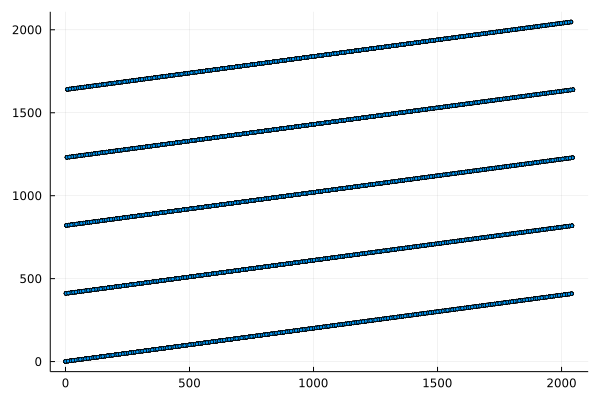

In [11]:
z = cong_prng(N=20000, a=1229, c=1, M=2^11, seed=4)
z = reshape(RANDU, (2, 10000))
scatter(z[1,:], z[2,:], markersize = 2, legend = false)